# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = merged_df["Mouse ID"].nunique()
mice_count


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_time_points = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_time_points

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = duplicate_time_points['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
cleaned_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
updated_mice_count = cleaned_df["Mouse ID"].nunique()
updated_mice_count

249

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Combine the series into a single DataFrame
summary_stats = pd.DataFrame({
    'mean': mean_tumor_volume,
    'median': median_tumor_volume,
    'variance': variance_tumor_volume,
    'std_dev': std_dev_tumor_volume,
    'sem': sem_tumor_volume
})

# Display the summary statistics DataFrame
summary_stats


,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_df.groupby('Drug Regimen').agg(
    mean=('Tumor Volume (mm3)', 'mean'),
    median=('Tumor Volume (mm3)', 'median'),
    var=('Tumor Volume (mm3)', 'var'),
    std=('Tumor Volume (mm3)', 'std'),
    sem=('Tumor Volume (mm3)', 'sem')
)
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

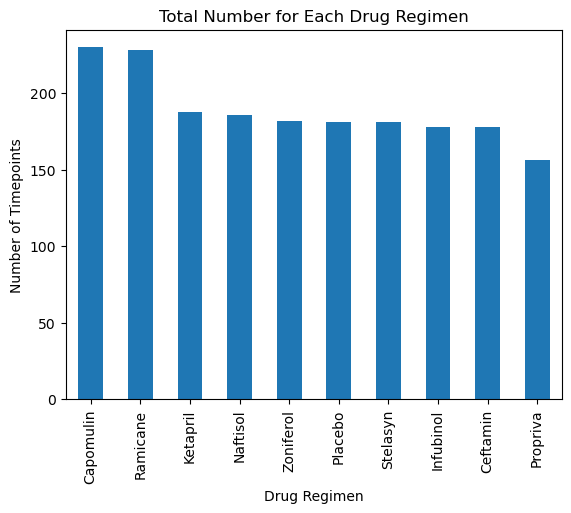

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_df['Drug Regimen'].value_counts()

regimen_counts.plot(kind='bar', title='Total Number for Each Drug Regimen', xlabel='Drug Regimen', ylabel='Number of Timepoints')

plt.show()

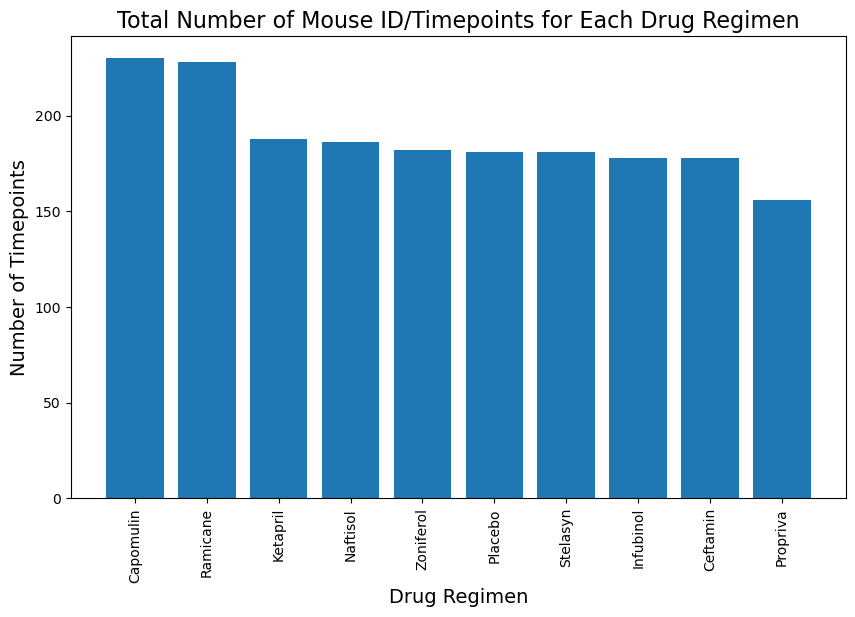

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_df['Drug Regimen'].value_counts()


plt.figure(figsize=(10,6))  # Set the figure size
plt.bar(regimen_counts.index, regimen_counts.values)


plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('Number of Timepoints', fontsize=14)


plt.xticks(rotation=90)

# Display the plot
plt.show()

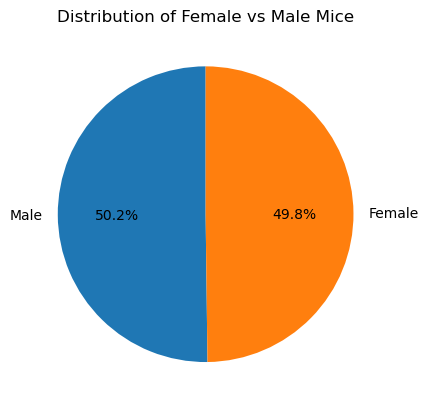

In [23]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
unique_mice = cleaned_df.drop_duplicates(subset=["Mouse ID"])
sex_counts = unique_mice['Sex'].value_counts()

sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Distribution of Female vs Male Mice')

plt.ylabel('') 
plt.show()

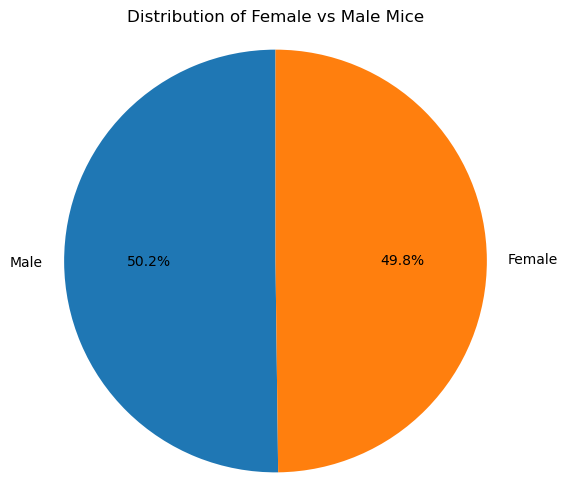

In [25]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart

plt.figure(figsize=(6,6)) 
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)


plt.title('Distribution of Female vs Male Mice')


plt.axis('equal')

plt.show()


## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_df = pd.merge(last_timepoint_df, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
  
for treatment in treatments:
    

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    treatment_data = merged_last_df[merged_last_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    # add subset

    tumor_vol_data.append(treatment_data)
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    
    print(f"{treatment} IQR: {iqr}")
    print(f"{treatment} lower bound: {lower_bound}")
    print(f"{treatment} upper bound: {upper_bound}")
    print(f"Potential outliers for {treatment}: {outliers}\n")


Capomulin IQR: 7.781863460000004
Capomulin lower bound: 20.70456164999999
Capomulin upper bound: 51.83201549
Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane IQR: 9.098536719999998
Ramicane lower bound: 17.912664470000003
Ramicane upper bound: 54.30681135
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol IQR: 11.477135160000003
Infubinol lower bound: 36.83290494999999
Infubinol upper bound: 82.74144559000001
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin IQR: 15.577752179999997
Ceftamin lower bound: 25.355449580000002
Ceftamin upper bound: 87.66645829999999
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)



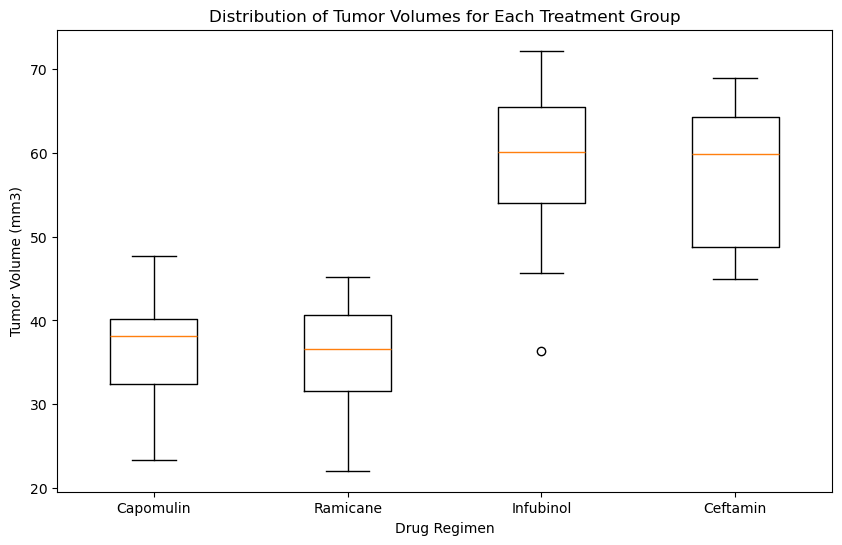

In [32]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the tumor volume data
plt.boxplot(tumor_vol_data, labels=treatments)

# Add titles and labels
plt.title('Distribution of Tumor Volumes for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()

## Line and Scatter Plots

In [35]:
capomulin_mice = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_mouse_ids = capomulin_mice['Mouse ID'].unique()
capomulin_mouse_ids

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

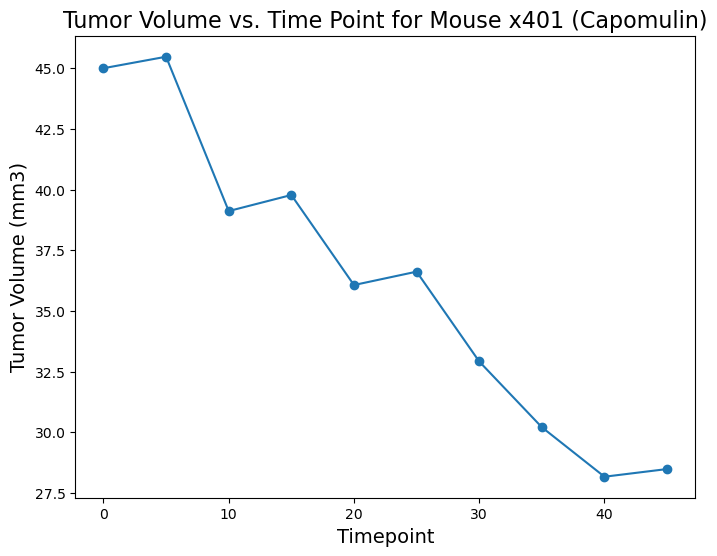

In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'x401'

# Filter the data for the selected mouse
capomulin_mouse_data = cleaned_df[(cleaned_df['Mouse ID'] == mouse_id) & (cleaned_df['Drug Regimen'] == 'Capomulin')]

# Generate a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(8,6))  # Set the figure size
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker='o')

# Add titles and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)', fontsize=16)
plt.xlabel('Timepoint', fontsize=14)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)

# Display the plot
plt.show()

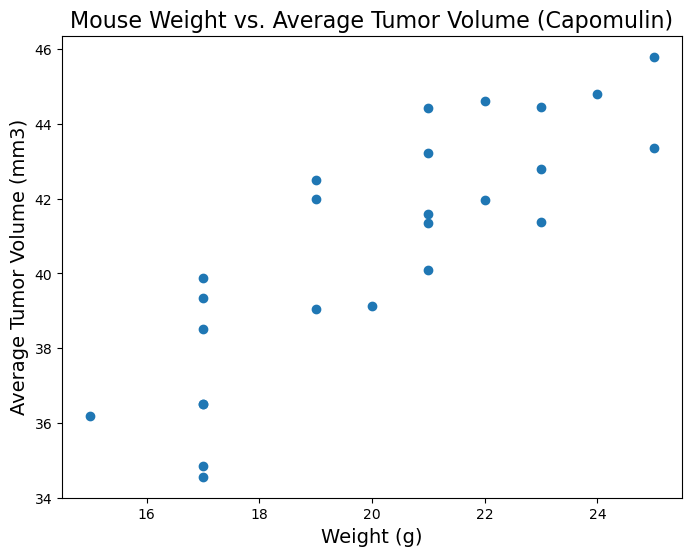

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# data for mice treated with Capomulin
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume for each mouse
capomulin_grouped = capomulin_data.groupby('Mouse ID').agg(
    avg_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    weight=('Weight (g)', 'first')  # Assuming weight is the same for each mouse
).reset_index()

# Generate a scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(8,6))  # Set the figure size
plt.scatter(capomulin_grouped['weight'], capomulin_grouped['avg_tumor_volume'], marker='o')

# Add titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)', fontsize=16)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)

# Display the plot
plt.show()

## Correlation and Regression

In [42]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = capomulin_grouped['weight'].corr(capomulin_grouped['avg_tumor_volume'])
print(f"Correlation coefficient: {correlation}")
(slope, intercept, r_value, p_value, std_err) = linregress(capomulin_grouped['weight'], capomulin_grouped['avg_tumor_volume'])
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")

Correlation coefficient: 0.8419363424694722
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared value: 0.7088568047708723


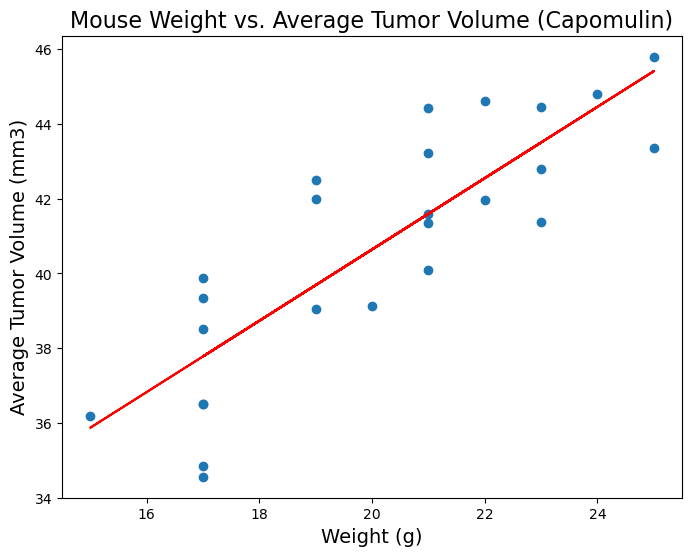

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(capomulin_grouped['weight'], capomulin_grouped['avg_tumor_volume'], marker='o')

# Plot the linear regression line
regression_line = slope * capomulin_grouped['weight'] + intercept
plt.plot(capomulin_grouped['weight'], regression_line, color='red')

# Add titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)', fontsize=16)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)

# Display the plot
plt.show()